In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import cv2

Load dataset (example: CIFAR-10)

In [67]:
dataset = keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = dataset.load_data()


In [79]:
img_path = r"C:\Users\Reach\Downloads\dog.jpg"
image = cv2.imread(img_path)
image_resized = cv2.resize(image, (128, 128))
image_normalized = image_resized / 255.0

Normail pixel values (0 to 1)

In [68]:
x_train = np.array([cv2.resize(img, (128, 128)) for img in x_train])
x_test = np.array([cv2.resize(img, (128, 128)) for img in x_test])

In [69]:
x_train, x_test = x_train / 255.0, x_test / 255.0


Define CNN Model

In [70]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes for CIFAR-10
])

C:\Users\Reach\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile the model

In [71]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Train the model

In [72]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 51ms/step - accuracy: 0.3478 - loss: 1.8101 - val_accuracy: 0.5258 - val_loss: 1.3117
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.5569 - loss: 1.2388 - val_accuracy: 0.5980 - val_loss: 1.1455
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.6529 - loss: 0.9880 - val_accuracy: 0.6366 - val_loss: 1.0348
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.7178 - loss: 0.8101 - val_accuracy: 0.6392 - val_loss: 1.0764
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 48ms/step - accuracy: 0.7638 - loss: 0.6770 - val_accuracy: 0.6404 - val_loss: 1.1068
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.8079 - loss: 0.5462 - val_accuracy: 0.6515 - val_loss: 1.1190
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.8523 - loss: 0.4237 - val_accuracy: 0.6362 - val_loss: 1.2440
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 48ms/step - accuracy: 0.8889 -

save the trained model

In [73]:
model.save("image_classification_model.h5")

In [74]:
model.save("image_classification_model.keras")

evaluate model performance


In [76]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")



313/313 - 4s - 12ms/step - accuracy: 0.6173 - loss: 1.9361
Test accuracy: 0.6173


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Class: bird


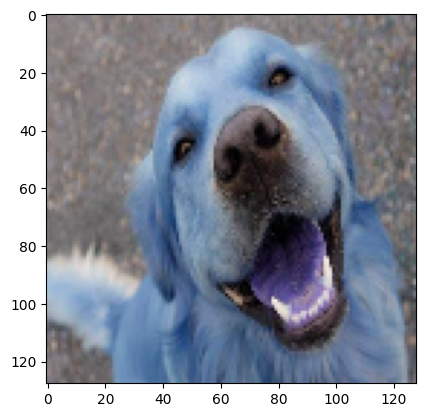

In [81]:
image_input = np.expand_dims(image_normalized, axis=0)
prediction = model.predict(image_input)
predicted_class = np.argmax(prediction)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(f"Predicted Class: {class_names[predicted_class]}")
plt.imshow(image_resized)

predict on a sample image

In [62]:
sample_image = np.expand_dims(x_test[0], axis=0)
prediction = model.predict(sample_image)
predicted_class = np.argmax(prediction)
print(f"Predicted Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Class: 8


Output the Class name

In [61]:
sample_index = 0
sample_image = np.expand_dims(x_test[sample_index], axis=0)
prediction = model.predict(sample_image)
predicted_class = np.argmax(prediction)
actual_label = y_test[sample_index][0]  # Extracting true label from test dataset

print(f"Predicted Object: {actual_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Object: 3
